In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../aesara')
from ops import ImpactsOp, FluxOp

In [6]:
t = np.linspace(67.8, 68.8, 1000)

ap = 1.0
tp = 0.2
ep = 0.2
pp = 365
wp = 0.1 * np.pi / 180
ip = 90.0 * np.pi / 180

am = 0.007
tm = -1.2
em = 0.1
pm = 3
om = 0.1 * np.pi / 180
wm = 90 * np.pi / 180
im = 88.0 * np.pi / 180
mm = 0.01

u1 = 0.5
u2 = 0.3
rp = 0.1
rm = 0.08

In [7]:
impacts = ImpactsOp(t)
flux = FluxOp()
outs = impacts(ap, tp, ep, pp, wp, ip, am, tm, em, pm, om, wm, im, mm)
bp, bpm, theta = outs[0], outs[1], outs[2]
f = flux(u1, u2, rp, rm, bp, bpm, theta)

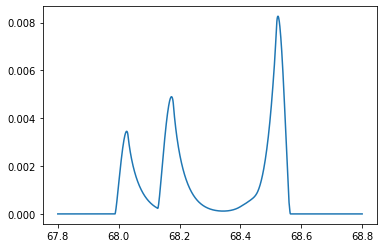

In [23]:
plt.plot(t, f[7].eval())

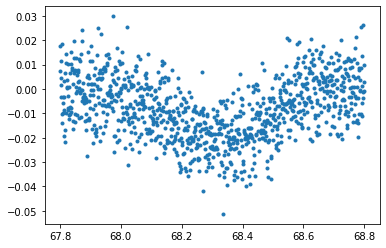

In [26]:
y = f[0].eval() + np.random.randn(1000) * 0.01
plt.plot(t, y, '.')

In [ ]:
import pymc as pmc
from aesara import tensor as tt

with pmc.Model() as model:
        
    ap = pmc.Uniform("ap", lower=0.0, upper=2.0, initval=1)
    tp = pmc.Normal("tp", mu=0.2, sigma=10.0)
    pp = pmc.Normal("pp", mu=365, sigma=100)
    wp = pmc.TruncatedNormal("wp", mu=0.0, sigma=1, lower=0.0)
    ip = pmc.Uniform("ip", lower=0.0, upper=np.pi/2, initval=np.pi/2-0.01)
    
    am = pmc.Uniform("am", lower=0.0, upper=0.1, initval=0.007)
    tm = pmc.Normal("tm", mu=-1.2, sigma=1.0)
    pm = pmc.TruncatedNormal("pm", mu=3, sigma=10, lower=0.0)
    om = pmc.TruncatedNormal("om", mu=0.01, sigma=1, lower=0.0)
    wm = pmc.TruncatedNormal("wm", mu=np.pi/2, sigma=1, lower=0.0)
    im = pmc.Uniform("im", lower=0.0, upper=np.pi/2, initval=np.pi/2 - 0.01)
    mm = pmc.Uniform("mm", lower=0.0, upper=1.0, initval=0.01)
    
    ep = pmc.Uniform("ep", lower=0.0, upper=1.0, initval=0.2)
    em = pmc.Uniform("em", lower=0.0, upper=1.0, initval=0.1)
    
    lsigma = pmc.Normal("lsigma", mu=-1, sigma=2)
    
    impacts = ImpactsOp(t)
    outs = impacts(ap, tp, ep, pp, wp, ip, am, tm, em, pm, om, wm, im, mm)
    obs = pmc.Normal("obs", mu=outs[0], sigma=tt.exp(lsigma), observed=y)
    trace = pmc.sample(3000, tune=2000)

In [ ]:
df = trace.to_dataframe()

In [ ]:
df

In [ ]:
plt.hist(df[('posterior', 'ep')], bins=50);

In [ ]:
import arviz as az

az.plot_pair(trace, divergences=True);

In [ ]:
az.plot_trace(trace);